In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

DATA EXPLORATION

In [37]:
data = pd.read_csv(r"C:\Users\adhit\OneDrive\Desktop\DIABETES PRED ANALYSIS 2-checkpoint.csv")

In [90]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1537 entries, 0 to 1536
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               1537 non-null   int64  
 1   Glucose                   1537 non-null   int64  
 2   BloodPressure             1537 non-null   int64  
 3   SkinThickness             1537 non-null   int64  
 4   Insulin                   1537 non-null   int64  
 5   BMI                       1537 non-null   float64
 6   DiabetesPedigreeFunction  1537 non-null   float64
 7   Age                       1537 non-null   int64  
 8   Outcome                   1537 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 108.2 KB
None


In [88]:
print(data.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [94]:
print(data.describe())

       Pregnancies      Glucose  BloodPressure  SkinThickness      Insulin  \
count  1537.000000  1537.000000    1537.000000    1537.000000  1537.000000   
mean      3.847105   120.859466      69.106051      20.539362    79.748211   
std       3.368345    31.981355      19.343215      15.942235   115.186487   
min       0.000000     0.000000       0.000000       0.000000     0.000000   
25%       1.000000    99.000000      62.000000       0.000000     0.000000   
50%       3.000000   117.000000      72.000000      23.000000    29.000000   
75%       6.000000   140.000000      80.000000      32.000000   127.000000   
max      17.000000   199.000000     122.000000      99.000000   846.000000   

               BMI  DiabetesPedigreeFunction          Age      Outcome  
count  1537.000000               1537.000000  1537.000000  1537.000000  
mean     31.988419                  0.471767    33.232921     0.348731  
std       7.880713                  0.331141    11.756719     0.476724  
min  

DATA CLEANING

In [44]:
# Check for missing values
print(data.isnull().sum())
# Separate features and target
X = data.drop('Outcome', axis=1)
y = data['Outcome']

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


DATA PREPROCESSING

In [47]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [51]:
# Reshape data for LSTM
X_train_lstm = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

DEFINE & TRAIN MODEL

In [54]:
# Define and train traditional machine learning models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Train models and evaluate
def evaluate_models(models, X_train, y_train, X_test, y_test):
    results = {}
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        
        results[model_name] = {
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1-score': f1
        }
    
    return results

# Evaluate traditional models
diabetes_results = evaluate_models(models, X_train_scaled, y_train, X_test_scaled, y_test)


DEFINE & TRAIN LSTM MODEL

In [57]:
def create_lstm_model():
    # Initialize the LSTM model
    model = Sequential()
    model.add(LSTM(100, activation='relu', input_shape=(1, X_train_scaled.shape[1])))
    model.add(Dense(1, activation='sigmoid'))  # Binary classification output

    # Compile the model
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

# Create and train the LSTM model
lstm_model = create_lstm_model()
lstm_model.fit(X_train_lstm, y_train, epochs=10, verbose=2, batch_size=32)

# Evaluate the LSTM model
loss, accuracy = lstm_model.evaluate(X_test_lstm, y_test)
print(f'LSTM Accuracy: {accuracy * 100:.2f}%')

# Get predictions from LSTM
y_pred_lstm = (lstm_model.predict(X_test_lstm) > 0.5).astype("int32")

C:\Users\adhit\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
39/39 - 3s - 89ms/step - accuracy: 0.6835 - loss: 0.6610
Epoch 2/10
39/39 - 0s - 3ms/step - accuracy: 0.7356 - loss: 0.5973
Epoch 3/10
39/39 - 0s - 3ms/step - accuracy: 0.7413 - loss: 0.5395
Epoch 4/10
39/39 - 0s - 4ms/step - accuracy: 0.7575 - loss: 0.5043
Epoch 5/10
39/39 - 0s - 4ms/step - accuracy: 0.7681 - loss: 0.4853
Epoch 6/10
39/39 - 0s - 3ms/step - accuracy: 0.7771 - loss: 0.4742
Epoch 7/10
39/39 - 0s - 3ms/step - accuracy: 0.7705 - loss: 0.4675
Epoch 8/10
39/39 - 0s - 4ms/step - accuracy: 0.7730 - loss: 0.4634
Epoch 9/10
39/39 - 0s - 3ms/step - accuracy: 0.7762 - loss: 0.4593
Epoch 10/10
39/39 - 0s - 3ms/step - accuracy: 0.7722 - loss: 0.4568
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7988 - loss: 0.3955  
LSTM Accuracy: 81.49%
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step


In [59]:
# Add LSTM results to the dictionary
diabetes_results['LSTM'] = {
    'Accuracy': accuracy_score(y_test, y_pred_lstm),
    'Precision': precision_score(y_test, y_pred_lstm),
    'Recall': recall_score(y_test, y_pred_lstm),
    'F1-score': f1_score(y_test, y_pred_lstm)
}

# Display all model results
for model, metrics in diabetes_results.items():
    print(f"\n{model} Performance for Diabetes Prediction:")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print(f"Precision: {metrics['Precision']:.4f}")
    print(f"Recall: {metrics['Recall']:.4f}")
    print(f"F1-score: {metrics['F1-score']:.4f}")


Logistic Regression Performance for Diabetes Prediction:
Accuracy: 0.8182
Precision: 0.7273
Recall: 0.6667
F1-score: 0.6957

Random Forest Performance for Diabetes Prediction:
Accuracy: 0.9675
Precision: 0.9388
Recall: 0.9583
F1-score: 0.9485

SVM Performance for Diabetes Prediction:
Accuracy: 0.8539
Precision: 0.8000
Recall: 0.7083
F1-score: 0.7514

KNN Performance for Diabetes Prediction:
Accuracy: 0.8474
Precision: 0.7426
Recall: 0.7812
F1-score: 0.7614

Gradient Boosting Performance for Diabetes Prediction:
Accuracy: 0.8734
Precision: 0.8132
Recall: 0.7708
F1-score: 0.7914

LSTM Performance for Diabetes Prediction:
Accuracy: 0.8149
Precision: 0.7241
Recall: 0.6562
F1-score: 0.6885


<Figure size 1200x1000 with 0 Axes>

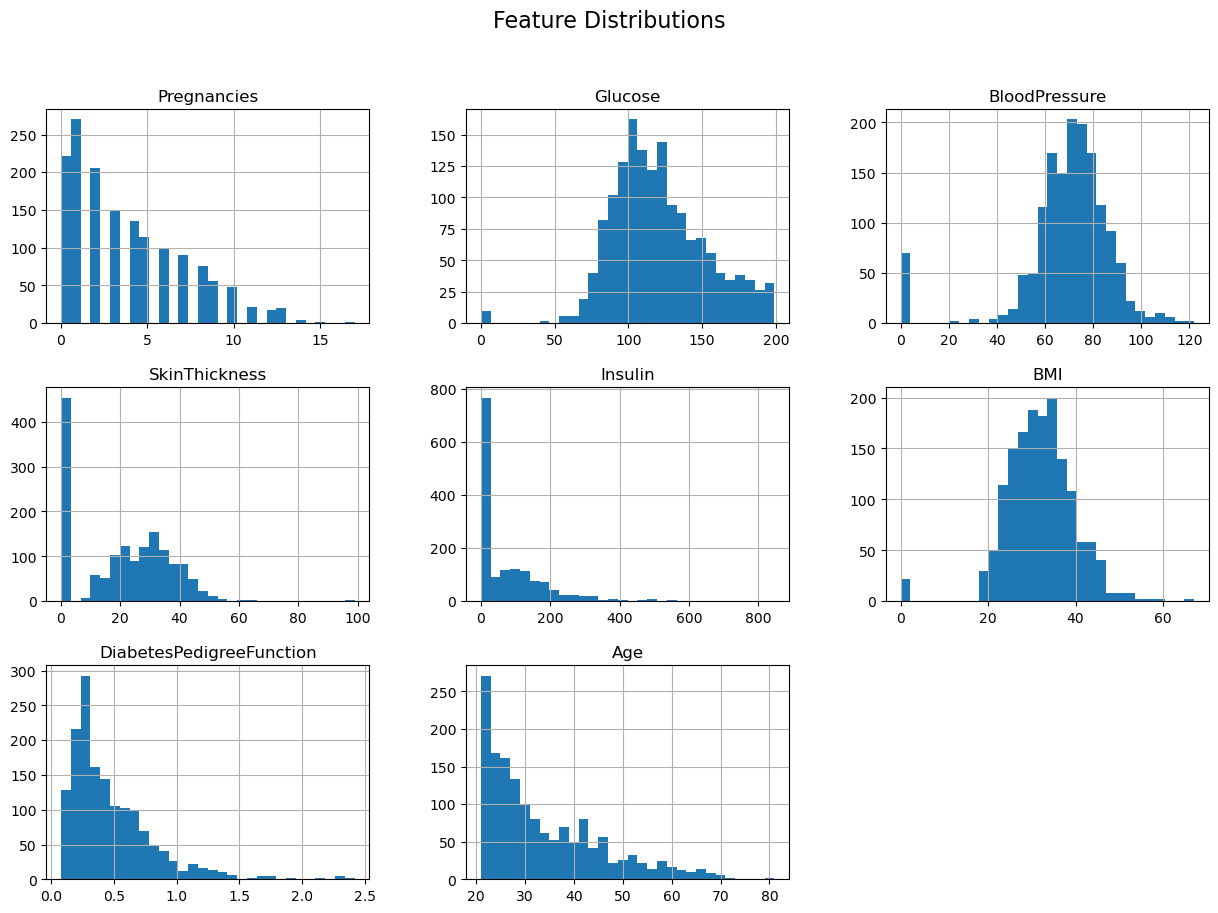

In [65]:
# Plot feature distributions
def plot_feature_distributions(data):
    plt.figure(figsize=(12, 10))
    data.drop('Outcome', axis=1).hist(bins=30, figsize=(15, 10), layout=(3, 3))
    plt.suptitle('Feature Distributions', fontsize=16)
    plt.show()

plot_feature_distributions(data)

C:\Users\adhit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\adhit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\adhit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\adhit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

<Figure size 1200x1000 with 0 Axes>

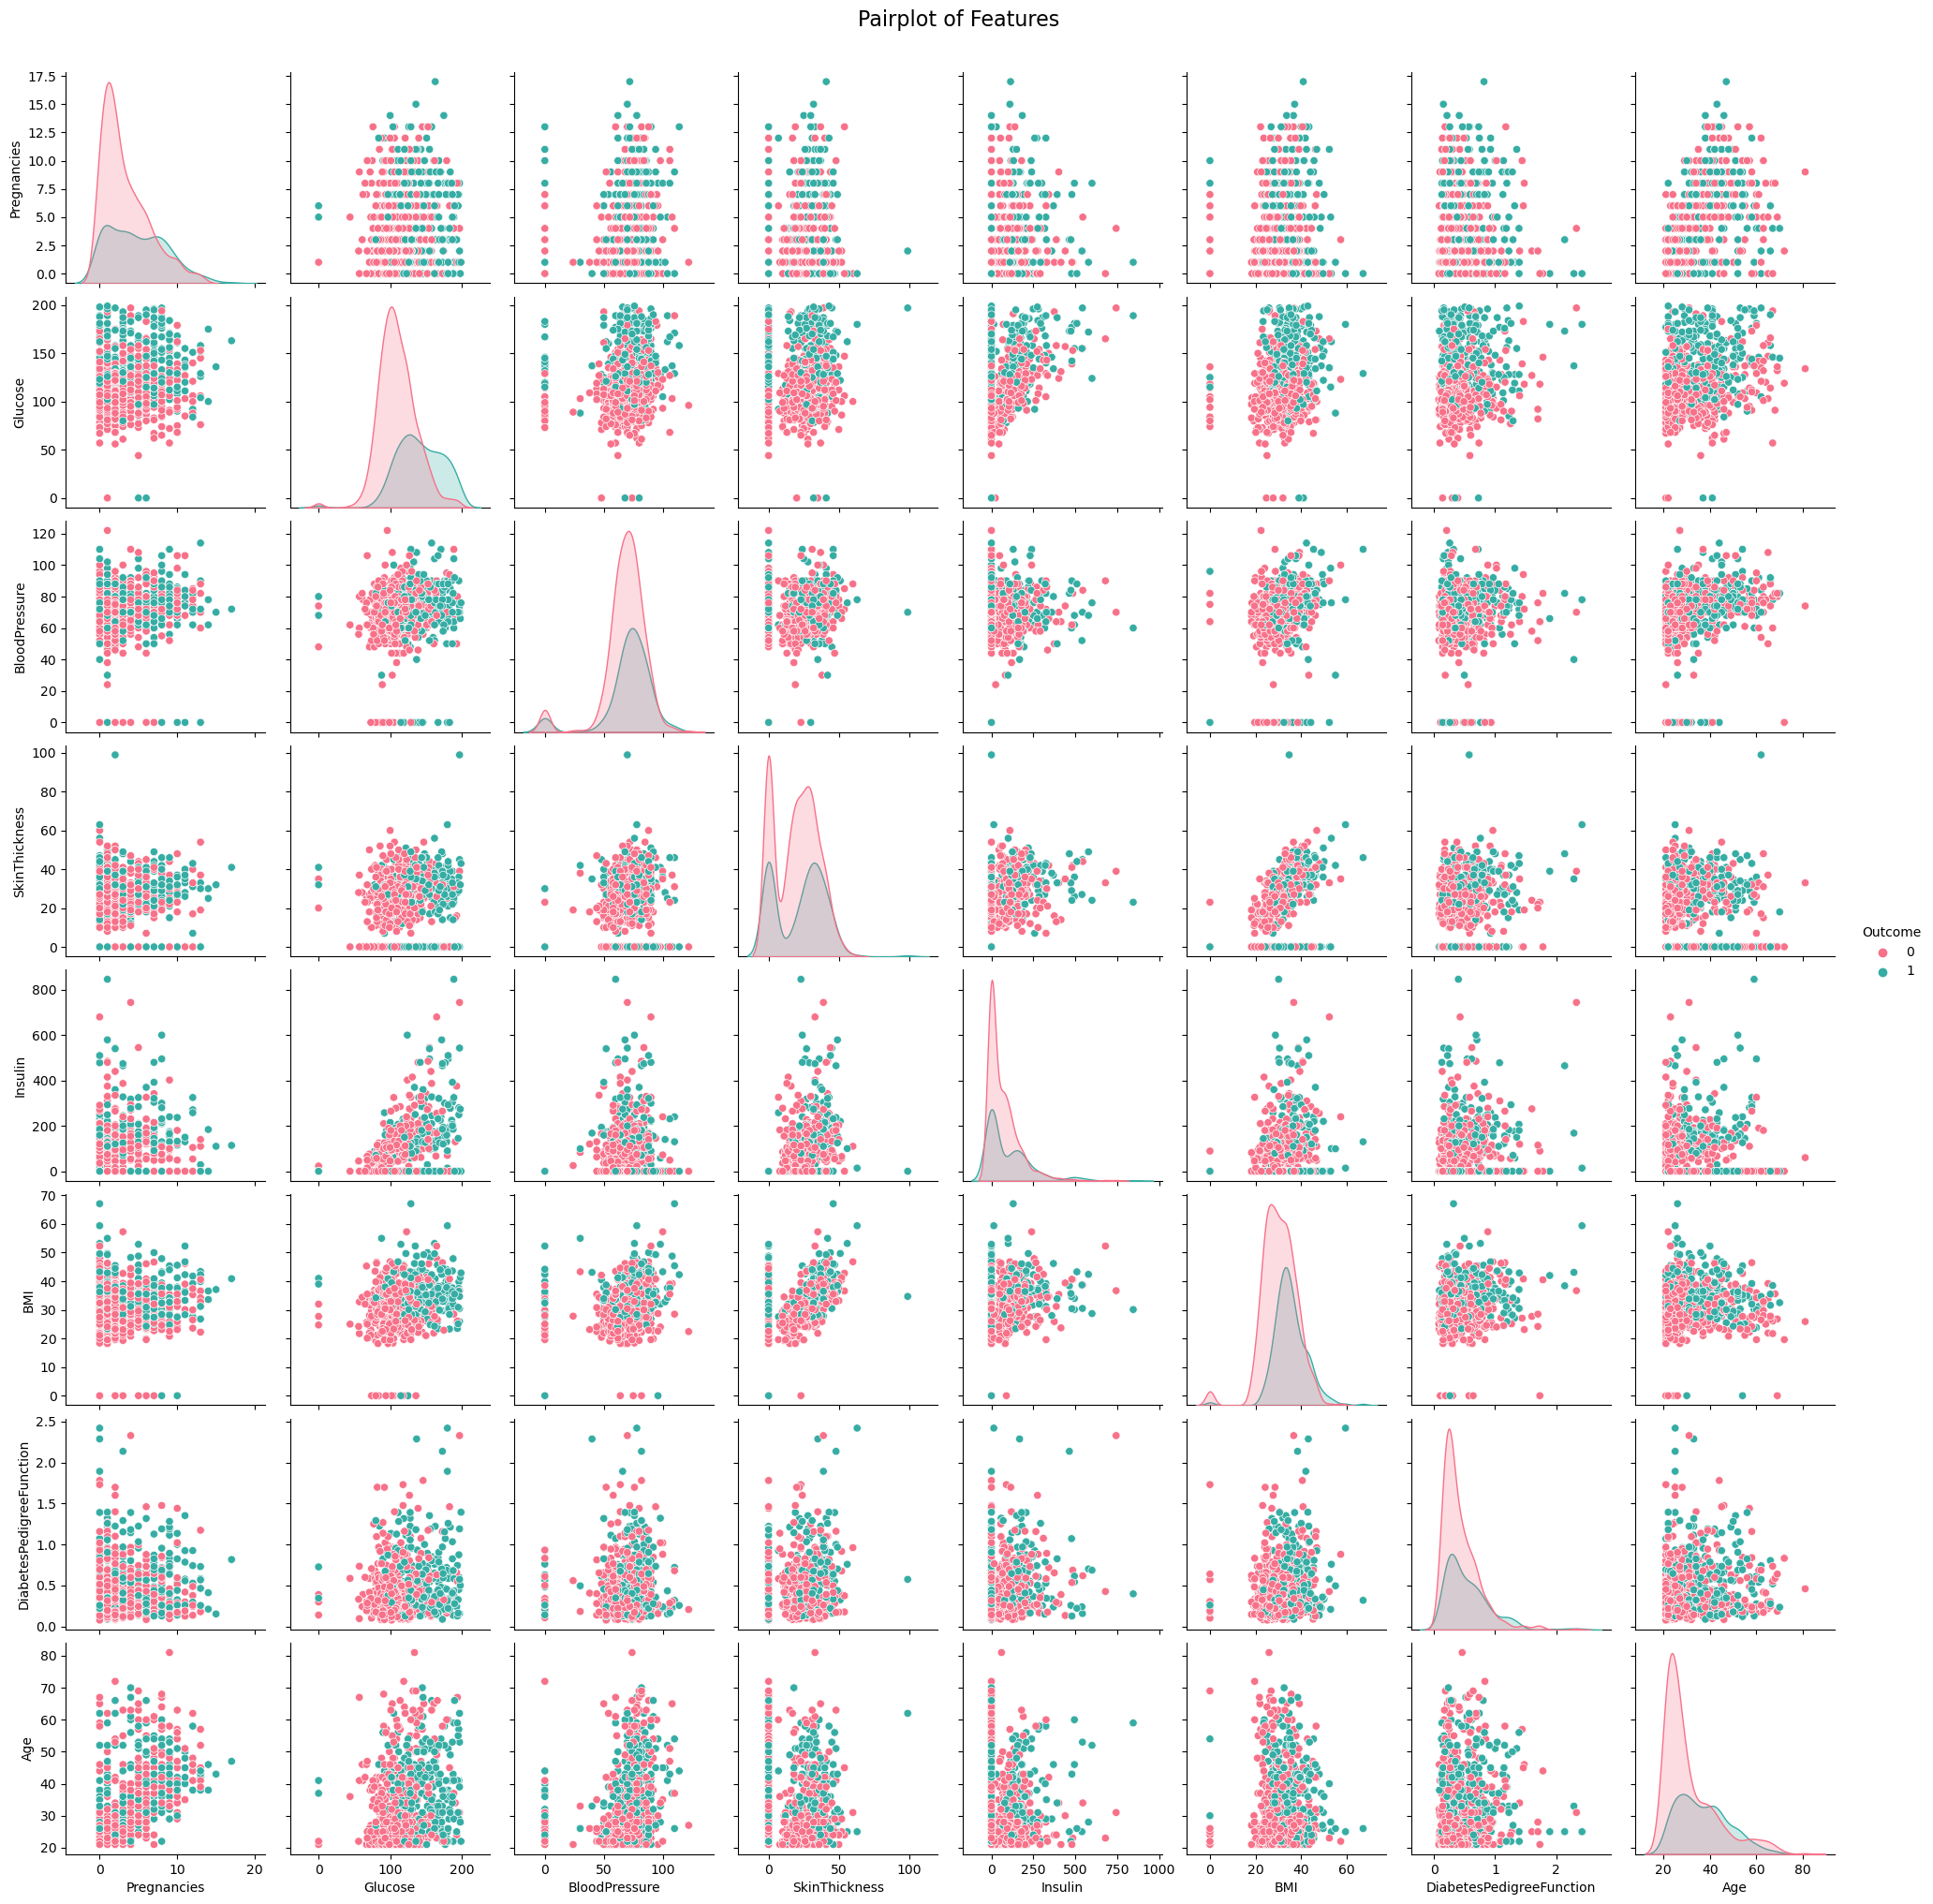

In [69]:
# Plot pairplot to visualize pairwise relationships
def plot_pairplot(data):
    plt.figure(figsize=(12, 10))
    sns.pairplot(data, hue='Outcome', diag_kind='kde', palette='husl')
    plt.suptitle('Pairplot of Features', y=1.02, fontsize=16)
    plt.show()

plot_pairplot(data)


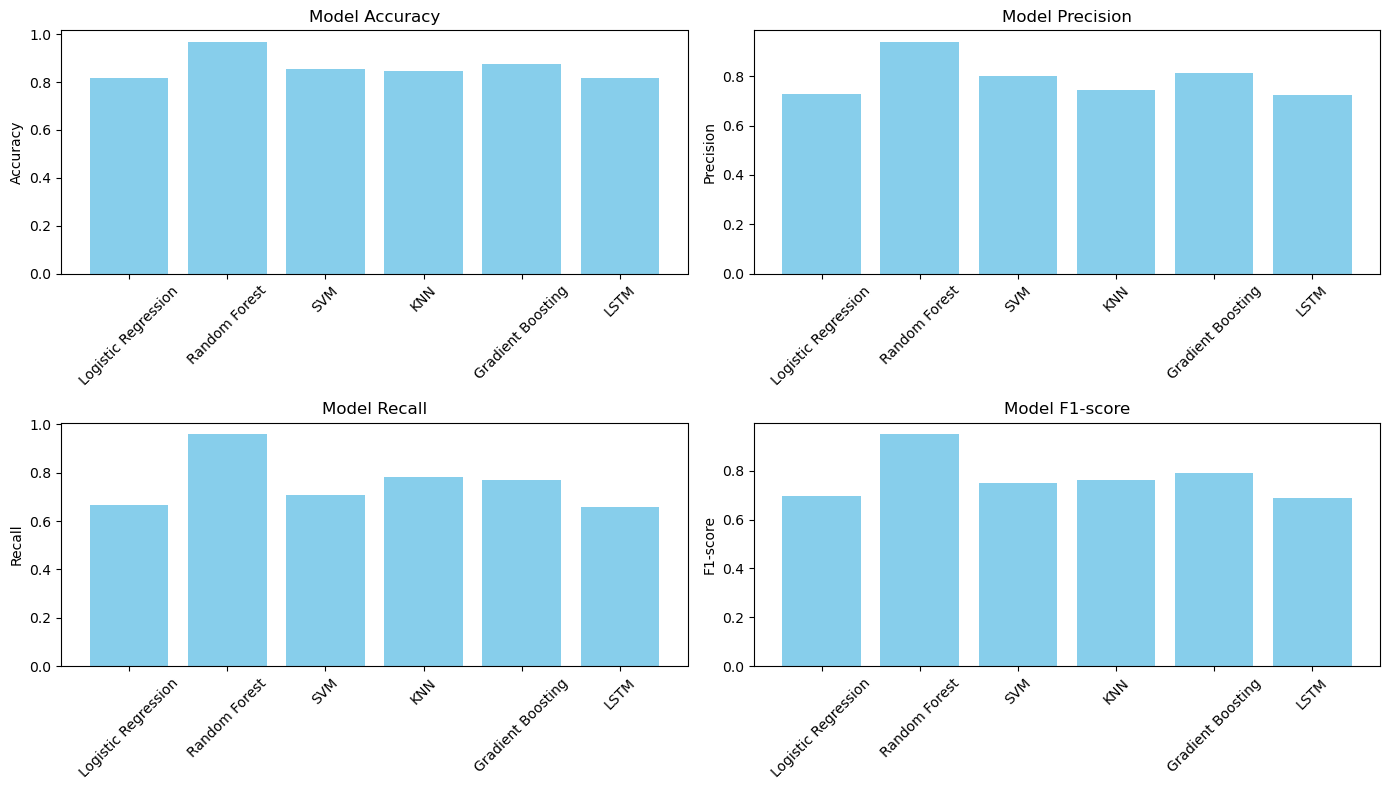

In [71]:
# Plot model performance
def plot_model_performance(results):
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
    plt.figure(figsize=(14, 8))
    
    for metric in metrics:
        plt.subplot(2, 2, metrics.index(metric) + 1)
        plt.bar(results.keys(), [results[model][metric] for model in results], color='skyblue')
        plt.title(f'Model {metric}')
        plt.ylabel(metric)
        plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()

plot_model_performance(diabetes_results)


PERSONALIZED LIFESTYLE RECOMMENDATION

In [80]:
# Define risk thresholds
def get_risk_level(probability):
    if probability < 0.3:
        return 'Low'
    elif probability < 0.6:
        return 'Moderate'
    else:
        return 'High'

# Example recommendations for each risk level
def get_recommendations(risk_level):
    recommendations = {
        'Low': [
            'Maintain a balanced diet with regular check-ups.',
            'Do physical activity at least 3 times a week.'
        ],
        'Moderate': [
            'Adopt a diet low in sugars and fats.',
            'Increase physical activity to 30 minutes a day, 5 times a week.',
            'Monitor blood glucose levels regularly.'
        ],
        'High': [
            'Follow a strict low-carb diet with guidance from a nutritionist.',
            'Engage in daily physical exercise and aim for weight loss if overweight.',
            'Consult with a healthcare provider for a comprehensive diabetes prevention plan.',
            'Consider medication if prescribed by your healthcare provider.'
        ]
    }
    return recommendations.get(risk_level, [])

In [82]:
# Example usage
def provide_personalized_recommendations(patient_features):
    # Predict diabetes probability
    patient_features_scaled = scaler.transform([patient_features])
    patient_features_lstm = np.reshape(patient_features_scaled, (1, 1, patient_features_scaled.shape[1]))
    probability = lstm_model.predict(patient_features_lstm)[0][0]
    
    # Get risk level and recommendations
    risk_level = get_risk_level(probability)
    recommendations = get_recommendations(risk_level)
    
    return risk_level, recommendations

In [86]:
# Example patient features
example_patient = [5, 148, 72, 35, 0, 33.6, 0.627, 50]  # Sample feature values
risk_level, recommendations = provide_personalized_recommendations(example_patient)
print(f'Risk Level: {risk_level}')
print('Recommendations:')
for rec in recommendations:
    print(f'- {rec}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Risk Level: High
Recommendations:
- Follow a strict low-carb diet with guidance from a nutritionist.
- Engage in daily physical exercise and aim for weight loss if overweight.
- Consult with a healthcare provider for a comprehensive diabetes prevention plan.
- Consider medication if prescribed by your healthcare provider.


C:\Users\adhit\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
